# Project Description 

Here is a short project description; This notebook is fictitious to illustrate common data analysis tasks. Intention here is to use this as a tempate for data classification work.

This **project1** will:

* load a sample dataset and explore the loaded data
* Prepares the Dataset by removing columns, filtering rows
* Show some descriptive stats on the data
* Show Inferential Statistics using Classification 
* provides results of the analysis 


### Description of the Dataset

> The dataset contains various columns extracted from device Census for specifically for OEM Models matching {**Surface Pro 4 **  ** Surface Book ** }

> The "Capable" Columns indicates whether that device is "Hello Capable" or not. 

> We know that all Surface pro 4 (include Surface Book) devices are hard ware ready and they become capable when suitable software drivers are installed 

> The task here is to detect if a device is "Hello capable or not"

> This problem is artificially made up for the purpose of creating this template and no animals are hurt during this production :)

In [3]:
try:       importlib.reload(Jupytils)
except:    import Jupytils
    
from Jupytils.Charts import *;
%reload_ext rmagic 
%reload_ext rpy2.ipython
showTopbar("Classification Template")
    
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#from statsmodels.regression.quantile_regression import QuantReg
#import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";

fileName = hand;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
displayDFs (dfOriginal, maxrows=3 );
#for c in dfOriginal.columns: print (c,  end=', ')

fileName="data/analysis1.xlsx"  # Data is located in analysis1.xlsx
fileName="data/analysis1-small.xlsx"  # Data is located in analysis1.xlsx
dfOriginal = LoadDataSet(fileName, columns=None, checkForDateTime=False);

# Filename can be 
#     1. URL: fileName="https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv"
#     2. csv, tsv or excel spread sheet (Database is not supported now)
#     3. It can be string with new lines

#analysis1.xlsx         - contains approx 1 million rows - therefore takes aout 2 minutes to load
#analysis1-small.xlsx   - contains approx 400 rows - I will use this first to test and switch to bigger file later 


#Explore the loaded data by uncommenting the following code 

print (dfOriginal.columns)
# -- Above will give:
# Index([u'ProcessedDateId', u'DeviceId', u'OEMModel', u'OSVersionFull', u'OSVersionToStr', u'FirstUpdatedDate',  
#        u'LastUpdatedDate', u'IngestTime', u'OSInstallDate',  u'FirstSeen', u'Capable_FirstSeen', u'AuthType', u'DBKLag',
#        u'DBKLagOSInstallDate', u'DBKLagFirstUpdatedDate', u'DBKLagFirstLastUpdatedDate', u'Capable'], dtype='object')
#
# 
displayDFs(dfOriginal);
# -- This will display raw data as is

<IPython.core.display.Javascript object>

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], dtype='object')


In [10]:
# Prepare dataset
#
# 1. Drop columns we don't need
# 2. Convert column datatypes as needed; to string, datetime, numbers as needed
# 3. Add Calculated Columns
# 4. Filter out rows and reindex the dataframe
# 5. Display the resulting dataframe
# 6. Show some descriptive statistics

#=====
#1. "ProcessedDateId" column is Intentionally misspelled to show it goes undetected if not careful

toDrop= [k.strip() for k in '''ProcessedDateId1, DeviceId, OSVersionFull,IngestTime,AuthType, FirstUpdatedDate, FirstSeen,DBKLagFirstUpdatedDate, DBKLagFirstLastUpdatedDate '''.split(",")]
dfL = dfOriginal.drop(toDrop, axis=1, errors="ignore")

#1a -> Set the Prediction column
#   -> Set class names if you know it or make it None
predictColumn = "Capable"
class_names = ["Not capable", "Capable"]

#2. Some wrong dates causing error here - so lets treat this as str
#dfL[u'Capable_FirstSeen'] = dfL[u'Capable_FirstSeen'].astype(str)    # Treat this columns as string
#dfL[u'ProcessedDateId']   = dfL[u'ProcessedDateId'].astype(str)      # Treat this columns as string (intentionally included)


#3. Calculated columns
#dfL[u'DBKLag'] = dfL[u'DBKLag']/60                                   # lets divide this by 60 
#dfL[u'DBKLag'] = dfL.DBKLag.apply(abs)                               # Convert to absolute value 
#
# Add a today's column 
# Convert to datetime - although it is already in datetime format
dfL['today'] = datetime.datetime.today()
#dfL.LastUpdatedDate  = pd.to_datetime(dfL.LastUpdatedDate)
#
# calculate the hours difference between today and last updated Date
#dfL['diff_last_to_today'] = (dfL.today - dfL.LastUpdatedDate) / np.timedelta64(1, 'h'); 

#4. Filter rows
n1 = dfL.shape[0]
#dfL = dfL[dfL.DBKLag > 1]                                            # Lets take only those that have a value > 0 
#
# Here are other common filtering you may use:
# dfL = dfL[dfL['OEMModel'] == "Surface Pro 4"]
# dfL = dfL[dfL.OSVersionFull.str.contains("th1") | dfL.OSVersionFull.str.contains("th2")]

n2 = dfL.shape[0]
print ("Filtering: Number of rows Before {} and After {}".format(n1,n2));

#4a. You may reshuffle the rows if needed to make sure they are not in any particular order
dfL = dfL.sample(frac=1).reset_index(drop=True)

#4b. 
# Once you filter, it is a good idea to reindex such that 0th row matches to 0th row in the resulting dataframe
# To see what happens if you didn't to reindex, comment out the following code and notice index 1 and 3 are visibly missing 

dfL = dfL.reset_index(drop=True) 

#5.
displayDFs(dfL, showIcons=True, showStats=False, maxrows = 4) ;

# You can see the entire dataframe by using the following
# HTML(dfL.to_html())


Filtering: Number of rows Before 401 and After 401


In [11]:
# You can even view the Excel spread sheet if you wanted to:
# Excel2Html(fileName, length="300px")


## Descriptive Statistics

In [30]:
td=dfL["M N O P Q".split()]
td.fillna(0)
td=td[0:100]
td.M = td.M.astype(float64)
td.N = td.N.astype(float64)
td.O = td.O.astype(float64)
td.P = td.P.astype(float64)
td.Q = td.Q.astype(float64)


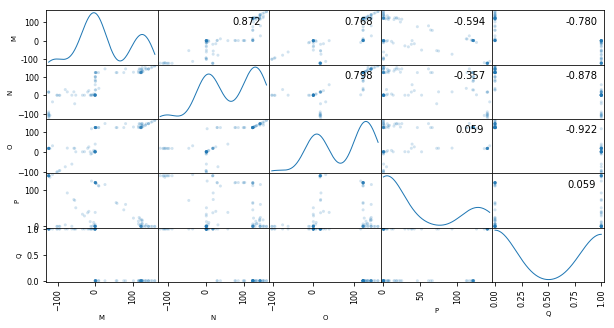

In [32]:
#6. Descriptive statistics 
# In above we see individual stats per column; here we see the interaction between columns

df =  prepareDF(td, makeCopy=True)
axes=scatter_matrix(df, alpha=0.2, diagonal='kde', figsize=(10, 5)); # diagonal can be 'hist';
corr = df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


In [13]:
# or see the ditribution of target variable based opn colors and histograms

c="r,g,b,c,m,y,k,w".split(",")
scatter_matrix(dfL, alpha=1, figsize=(10,10), s=100, c=df[predictColumn].apply(lambda x:c[x]));

NameError: name 'df' is not defined

# 6a. Cross tab calculations


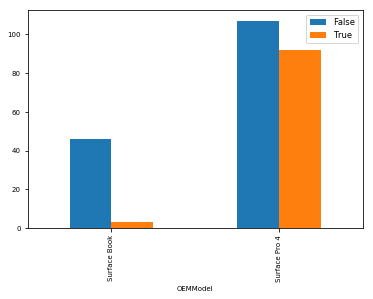

In [6]:
print ("# 6a. Cross tab calculations")
d=pd.crosstab(dfL.OEMModel, dfL[predictColumn].astype(bool))
d.plot(kind="bar")
HTML(d.to_html())

plt.legend(loc='upper right');

#6b lets see the distribution of DBKLag pivotting on [predictColumn] flag


''

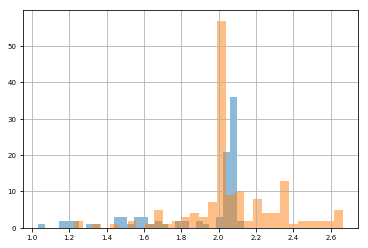

In [7]:
print ("#6b lets see the distribution of DBKLag pivotting on [predictColumn] flag")

dfs = [dfL[dfL[predictColumn] == k] for k in dfL[predictColumn].unique() ] 

interestingColumns=['DBKLag']
for d in dfs:
    for i in interestingColumns:
        d[i].hist(alpha=0.5, bins=30, label=d[predictColumn], grid=True)
;

#6b PCA and view scatter plot on 2D
Dropping in prepareDF -  Index(['ProcessedDateId', 'Capable_FirstSeen'], dtype='object')


,0,1,Capable,Capable_idx
0,8837565537.863,-1758174707.195,1,1
1,-4136562612.164,-569203803.448,0,0
2,-4112163197.815,-567143732.279,0,0
3,8774248601.756,-1682069670.046,1,1
...,...,...,...,...
244,8840757691.850,-1762023103.892,1,1
245,-4102060764.642,-571753848.370,0,0
246,-3971595554.811,-575218465.899,0,0
247,8842034903.530,-1763562171.941,1,1


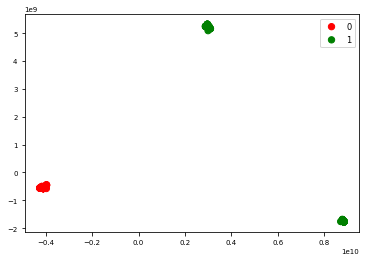

In [8]:
print ("#6b PCA and view scatter plot on 2D")

PCAPlot(dfL, predictColumn)

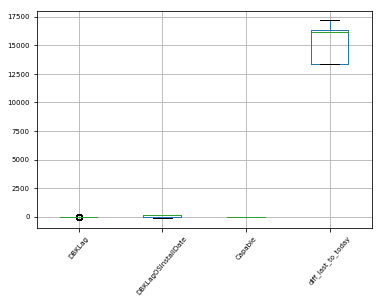

In [9]:
# Review the box plot of the resulting dataframe
#
dfL.boxplot(figsize=(1150,1150), rot=50 , return_type='axes');

## Predictive Analytics

In [10]:
# Lets convert the columns to numeric 
# Please see Prepare in Features.py 

df =  prepareDF(dfL, makeCopy=True)

# After you run this, this will remove ProcessDateId column since it seems like a key column
# Review the resulting final data set;
display(dfL.head(), "==>" ,df.head() )

# shuffle the rows so that it won't cause hidden problems in case
df = df.sample(frac=1).reset_index(drop=True)


Dropping in prepareDF -  Index(['ProcessedDateId', 'Capable_FirstSeen'], dtype='object')


,ProcessedDateId,OEMModel,OSVersionToStr,LastUpdatedDate,OSInstallDate,Capable_FirstSeen,DBKLag,DBKLagOSInstallDate,Capable,today,diff_last_to_today
0,20160225,Surface Pro 4,10586.00104.160126.1819,2016-02-25 14:57:56,2016-02-04,2015-10-24 19:00:00,2.064,-102.208,1,2017-09-03 11:23:33.441908,13340.427
1,20151002,Surface Book,10240.16498.150819.1946,2015-10-02 08:50:35,2015-10-02,nan,2.438,146.673,0,2017-09-03 11:23:33.441908,16850.550
2,20151022,Surface Pro 4,10240.16498.150819.1946,2015-10-22 17:42:19,2015-10-16,nan,2.099,132.673,0,2017-09-03 11:23:33.441908,16361.687
3,20160225,Surface Pro 4,10586.00104.160126.1819,2016-02-25 04:05:07,2016-01-05,2015-10-24 21:00:00,2.055,-72.125,1,2017-09-03 11:23:33.441908,13351.307
4,20151007,Surface Pro 4,10240.16520.150916.2039,2015-10-07 01:22:38,2015-10-06,nan,2.360,142.673,0,2017-09-03 11:23:33.441908,16738.015


'==>'

,OEMModel,OSVersionToStr,LastUpdatedDate,OSInstallDate,DBKLag,DBKLagOSInstallDate,Capable,today,diff_last_to_today
0,1,14,20160225145756,20160204000000,2.064,-102.208,1,20170903112333,13340.427
1,0,1,20151002085035,20151002000000,2.438,146.673,0,20170903112333,16850.550
2,1,1,20151022174219,20151016000000,2.099,132.673,0,20170903112333,16361.687
3,1,14,20160225040507,20160105000000,2.055,-72.125,1,20170903112333,13351.307
4,1,2,20151007012238,20151006000000,2.360,142.673,0,20170903112333,16738.015


In [ ]:
%%time
cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        #"SVM"               , sklearn.svm.SVC(), 
        #"Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression()
];

y = df[predictColumn]
X = df.drop(predictColumn, axis=1)
Classify(X,y, drawConfusionMatrix=False, classifiers=cls, scale=False, printDebug=False)

In [ ]:
%run "../common.ipynb"
decisionTrees = []

for k in range( int(len(cls)/2)):
    d = cls[k*2+1];
    if (str(type(d)).find('DecisionTreeClassifier') > 0):
        decisionTrees.append(cls[k*2])
        decisionTrees.append(cls[k*2+1])

d = DrawDecisionTree(X,y, decisionTrees, class_names);


In [ ]:
%run "../common.ipynb"
# Lets run the decision tree by removing the most significant feature to see 
#  which other features bubbles up in the significance list

for i in range(min(5, len(X.columns)-1) ) :
    mostSignificant=np.argsort(decisionTrees[1].feature_importances_)[-1]
    c = X.columns[mostSignificant]
    print ("***********", i, ": Most Significant Column is: ", c)
    #HTML("<h2> Dropping column and running next </h2><hr>")
    X = X.drop(c, axis=1)
    (X1,y1,ra,cls) = Classify(X,y, True, drawConfusionMatrix=True, classifiers=decisionTrees, scale=False)
    DrawDecisionTree(X,y, cls, class_names)

## Results

> Present conclusions Here